Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#normalization_layer = tensorflow.keras.layers.experimental.preprocessing.Rescaling(1./255)


In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

#drive.mount('https://drive.google.com/drive/folders/1G1NRARS7CUudpqTPGI2KSgRXZ08lScoS')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
## UNCOMMENT FOR GOOGLE COLAB

# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)
# data_dir_train = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Train')
# data_dir_test = pathlib.Path('/content/drive/My Drive/Colab Notebooks/SkinCancer/Test')


In [4]:
## UNCOMMENT WHEN WORKING IN LOCAL JUPYTER

data_dir_train = pathlib.Path('Data/Train')
data_dir_test = pathlib.Path('Data/Test')

In [5]:
import os
print (os.getcwd())

C:\MachineLearning\MachineLearning\Tensor\CNN\SkinCancer


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:


image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.
Use 80% of the images for training, and 20% for validation.

In [7]:
directory_train = data_dir_train
directory_test = data_dir_test

training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

testing_ds=keras.utils.image_dataset_from_directory(
    directory_test,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.
Found 118 files belonging to 9 classes.


### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = training_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

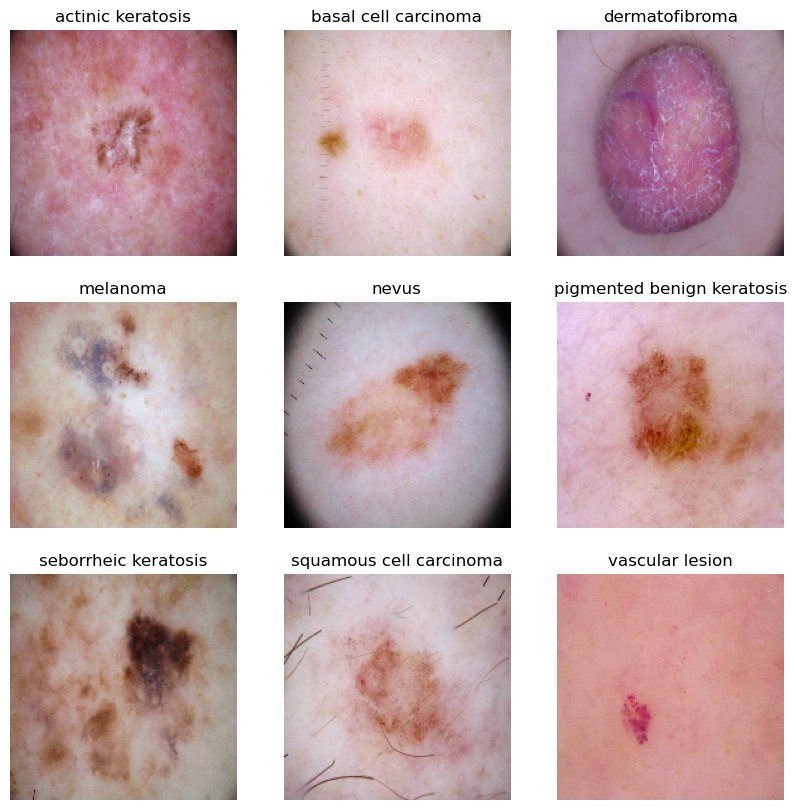

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

for i in range(len(class_names)):
    filtered_ds = training_ds.filter(lambda x, l: tf.math.equal(l[0], i))
    for image, label in filtered_ds.take(1):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(image[0].numpy().astype('uint8'))
        plt.title(class_names[label.numpy()[0]])
        plt.axis('off')
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [12]:
### Your code goes here
num_classes = len(class_names)
normalization_layer = Rescaling(1./255)

normalized_training_set = training_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))

normalized_validation_set = validation_ds.map(lambda x, y: (normalization_layer(x), y))
validation_image_batch,validation_labels_batch = next(iter(normalized_validation_set))

normalized_testing_set = testing_ds.map(lambda x, y: (normalization_layer(x), y))
testing_image_batch,testing_labels_batch = next(iter(normalized_testing_set))



training_labels_batch = tf.keras.utils.to_categorical(training_labels_batch, num_classes)
validation_labels_batch = tf.keras.utils.to_categorical(validation_labels_batch, num_classes)

In [13]:
normalized_training_set

<_MapDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [14]:
# Todo, choose an appropirate optimiser and loss function

from keras.optimizers import Adam


model = Sequential([
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)



Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.1635 - loss: 2.4822 - val_accuracy: 0.2662 - val_loss: 1.9932
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.2545 - loss: 1.9655 - val_accuracy: 0.3781 - val_loss: 1.6802
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.3965 - loss: 1.6655 - val_accuracy: 0.4653 - val_loss: 1.5156
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.4775 - loss: 1.4716 - val_accuracy: 0.5280 - val_loss: 1.3940
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.5364 - loss: 1.3321 - val_accuracy: 0.5391 - val_loss: 1.3917
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.5596 - loss: 1.2585 - val_accuracy: 0.4989 - val_loss: 1.4597
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.5490 - loss: 1.3074 - val_accuracy: 0.5302 - val_loss: 1.4158
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.5899 - loss: 1.2171 - val_accuracy: 0

In [17]:
#training_image_batch.shape
training_labels_batch.shape
training_labels_batch

<tf.Tensor: shape=(32, 9), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
      

### Visualizing training results

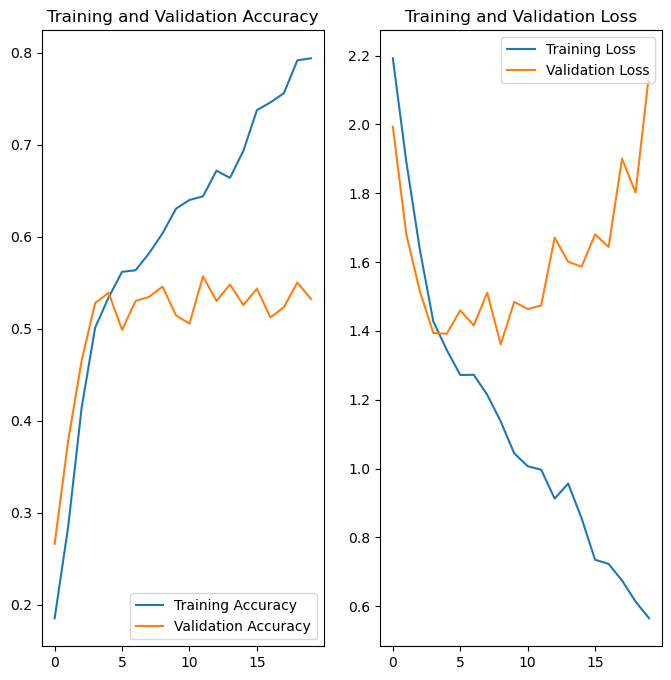

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


### Write your findings here

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras.layers import Layer
#from tensorflow.keras.layers import SomeLayer
import tensorflow as tensorflow
augmentation_data = keras.Sequential([
                                      layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1),
])



C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


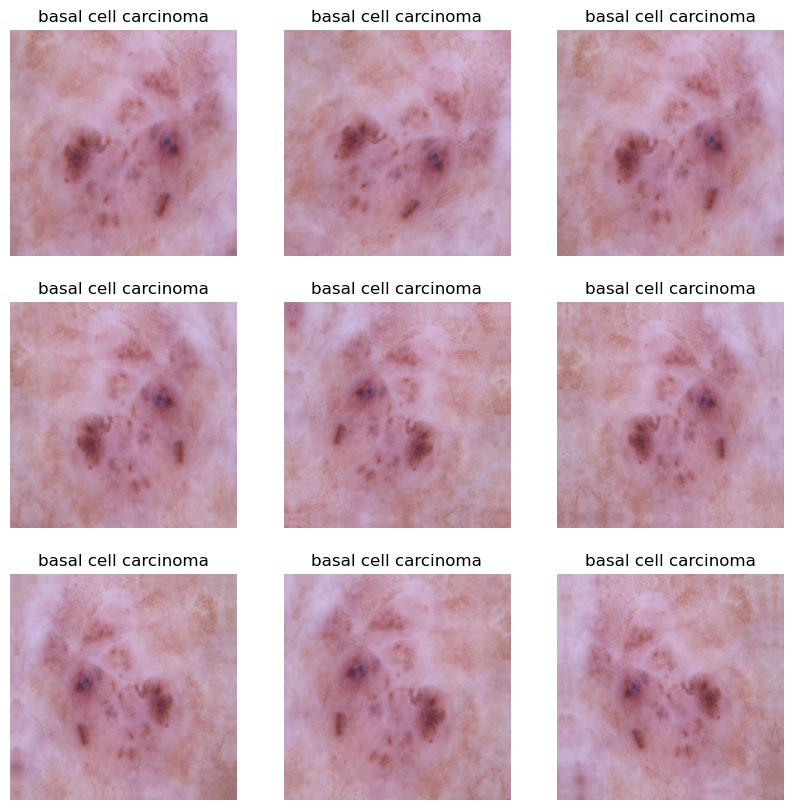

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in training_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  augmentation_data,
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])

### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Compiling the model

In [22]:
## Your code goes here


### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs = 20
history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 187ms/step - accuracy: 0.2247 - loss: 2.1099 - val_accuracy: 0.4027 - val_loss: 1.7162
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 188ms/step - accuracy: 0.4126 - loss: 1.7070 - val_accuracy: 0.4631 - val_loss: 1.5191
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 184ms/step - accuracy: 0.4837 - loss: 1.5163 - val_accuracy: 0.5302 - val_loss: 1.4002
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.5089 - loss: 1.4244 - val_accuracy: 0.5213 - val_loss: 1.4328
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5017 - loss: 1.3868 - val_accuracy: 0.4676 - val_loss: 1.4734
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.5342 - loss: 1.3194 - val_accuracy: 0.4899 - val_loss: 1.4340
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.5354 - loss: 1.3162 - val_accuracy: 0.5257 - val_loss: 1.3816
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.5475 - loss: 1.2689 - val_accu

### Visualizing the results

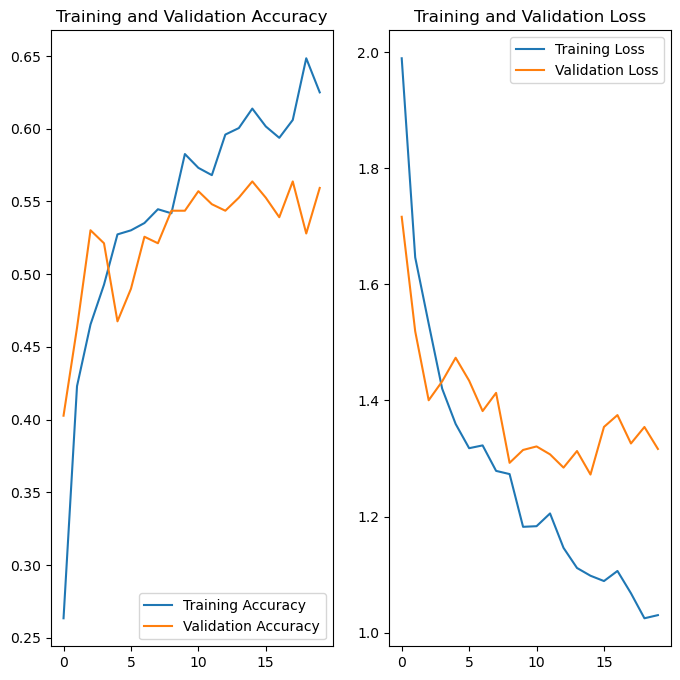

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
## Your code goes here.
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

## Extract the class labels (lesions)
lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))
images_path_list

2239


['Data\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0025992.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026040.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026149.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026171.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026194.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026212.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026457.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026468.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026525.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026575.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026625.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026626.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026650.jpg',
 'Data\\Train\\actinic keratosis\\ISIC_0026702

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [26]:
!pip install Augmentor

In [27]:
data_dir_train

WindowsPath('Data/Train')

In [44]:
# temp
path_to_training_dataset=data_dir_train
for i in class_names:
    print (str(path_to_training_dataset) + "\\" +  str(i))

Data\Train\actinic keratosis
Data\Train\basal cell carcinoma
Data\Train\dermatofibroma
Data\Train\melanoma
Data\Train\nevus
Data\Train\pigmented benign keratosis
Data\Train\seborrheic keratosis
Data\Train\squamous cell carcinoma
Data\Train\vascular lesion


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [45]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "\\" + str(i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Data\Train\actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF40B72C10>: 100%|█| 500/500 [00:02<00:


Initialised with 376 image(s) found.
Output directory set to Data\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FED29FA250>: 100%|█| 500/500 [00:02<00:00, 241.94 Samples


Initialised with 95 image(s) found.
Output directory set to Data\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF3CB007D0>: 100%|█| 500/500 [00:02<00:


Initialised with 438 image(s) found.
Output directory set to Data\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FF40B67F10>: 100%|█| 500/500 [00:13<00:00, 38.13 Samples


Initialised with 357 image(s) found.
Output directory set to Data\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF40B8AC90>: 100%|█| 500/500 [00:12<00:00, 40.96 Samples/


Initialised with 462 image(s) found.
Output directory set to Data\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FEE47734D0>: 100%|█| 500/500 [00:02<00:00, 198.45 Samples


Initialised with 77 image(s) found.
Output directory set to Data\Train\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1FF3FDFFA10>: 100%|█| 500/500 [00:06<00


Initialised with 181 image(s) found.
Output directory set to Data\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FF3F7F3290>: 100%|█| 500/500 [00:02<00:00, 204.72 Samples


Initialised with 139 image(s) found.
Output directory set to Data\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1FF3F8BC850>: 100%|█| 500/500 [00:03<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [47]:

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [48]:
# #img_path  = os.path.join(data_dir_train, 'output','*','*.jpg')
# images_path_list = [ i for i in glob(os.path.join(data_dir_train, 'output','*','*.jpg')) ]
# print(len(images_path_list))


0


In [ ]:
# lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, 'output//', '*', '*.jpg')) ]
# print(len(lesions_list))
# images_path_list

### Lets see the distribution of augmented data after adding new images to the original training data.

In [63]:
path_list = [x for x in glob(os.path.join(data_dir_train,'*', '*.jpg'))]
#path_list

path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list_new

In [56]:
data_dir_train

WindowsPath('Data/Train')

In [71]:
# lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, 'output','*', '*.jpg'))]
# # lesion_list_new

# lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
# # lesion_list

# lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
#lesion_list

In [72]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

dataframe_dict = dict(zip(path_list, lesion_list))


In [73]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])


df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

frames = [original_df, df2]
new_df = pd.concat(frames)
#new_df = pd.DataFrame
#new_df = original_df.concat(df2)
#original_df

In [75]:
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [76]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [77]:
directory_train = data_dir_train
directory_test = data_dir_test

#data_dir_train="path to directory with training data + data created using augmentor"
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)



training_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [78]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

validation_ds=keras.utils.image_dataset_from_directory(
    directory_train,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [79]:
class_names = validation_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


#### **Todo:** Create your model (make sure to include normalization)

In [80]:
## your code goes here



normalized_training_set = training_ds.map(lambda x, y: (normalization_layer(x), y))
training_image_batch,training_labels_batch = next(iter(normalized_training_set))

normalized_validation_set = validation_ds.map(lambda x, y: (normalization_layer(x), y))
validation_image_batch,validation_labels_batch = next(iter(normalized_validation_set))

normalized_testing_set = testing_ds.map(lambda x, y: (normalization_layer(x), y))
testing_image_batch,testing_labels_batch = next(iter(normalized_testing_set))



training_labels_batch = tf.keras.utils.to_categorical(training_labels_batch, num_classes)
validation_labels_batch = tf.keras.utils.to_categorical(validation_labels_batch, num_classes)


from keras.optimizers import Adam


model = Sequential([
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu,input_shape=training_image_batch.shape[1:]),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(num_classes)
])



C:\Users\mathu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [82]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [83]:
epochs = 50
## Your code goes here, use 50 epochs.

history = model.fit(
  normalized_training_set,
  validation_data=normalized_validation_set,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 30s 172ms/step - accuracy: 0.2034 - loss: 2.1724 - val_accuracy: 0.4128 - val_loss: 1.5287
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 158ms/step - accuracy: 0.4490 - loss: 1.4964 - val_accuracy: 0.5316 - val_loss: 1.2950
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 27s 158ms/step - accuracy: 0.5246 - loss: 1.2520 - val_accuracy: 0.5479 - val_loss: 1.2228
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.5939 - loss: 1.1024 - val_accuracy: 0.6043 - val_loss: 1.0768
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.6572 - loss: 0.9139 - val_accuracy: 0.6162 - val_loss: 1.0739
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 165ms/step - accuracy: 0.7101 - loss: 0.7945 - val_accuracy: 0.6674 - val_loss: 0.9889
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 169ms/step - accuracy: 0.7800 - loss: 0.6283 - val_accuracy: 0.7023 - val_loss: 0.9041
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.8238 - loss: 0

169/169 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - accuracy: 0.9481 - loss: 0.1180 - val_accuracy: 0.7209 - val_loss: 1.9834


#### **Todo:**  Visualize the model results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [40]:
class_names = training_ds.class_names
print(class_names)

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [85]:
training_image_batch.shape[:]

TensorShape([32, 180, 180, 3])